# Machine Learning

## What is machine learning?
Machine learning (ML) is often categorized as a subfield of artificial intelligence (AI). We can think of ML as a means of *building models of data* that can remember (the features of) the data. ML involves building mathematical functions/models to help understanding data. "Learning" can be performed when we give these models *tunable parameters* that can be adapted to available observed data (training data). In this way the program (ML model) can be considered to be learning from the data. Once these models have been fit to previously seen data, they can be used to predict and understand the aspects/features of unseen data (testing data).

## Categories of Machine Learning

ML models can be broadly categorized into two main types: supervised and unsupervised learning.

*Supervised learning* involves somehow modeling the relationship between measured features of data and some label associated with the data. In this case, we have access to the observations and their corresponding labels. Typically, labeling is a costly process that needs to be done by human experts. Once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into *classification* tasks and *regression* tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.

*Unsupervised learning* involves modeling the features of a dataset without accessing to any labels, and is often described as "letting the dataset speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction.*
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more compressed representations of the data.

In addition, there are so-called *semi-supervised learning* methods, when only incomplete labels are available, as well as, reinforcement learning.

## Data science application
### Supervised Regression to predict houce prices
#### References
https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878

https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks

In [1]:
# !curl -o house_data.csv https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv?accessType=DOWNLOAD

#### Reading the data and understand how they would look like.

In [2]:
import pandas as pd
sf = pd.read_csv('house_data.csv')
sf.head(10)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0
5,12,Address: 156 Lowell Street,San FranciscoSales price: 460000Sales date: 0...,156 Lowell St,1.0,2.0,1250.0,02/17/2016,460000.0,37.710226,-122.446027,Crocker Amazon,5.0,SingleFamily,1924.0,703392.0,"823,000",94112.0,15178981.0
6,13,Address: 735 Lakeview Avenue,San FranciscoSales price: 532000Sales date: 0...,735 Lakeview Ave,1.0,3.0,1032.0,02/17/2016,532000.0,37.718024,-122.460332,Oceanview,6.0,SingleFamily,1939.0,741715.0,"762,700",94112.0,15192274.0
7,14,Address: 430 Capistrano Avenue,San FranciscoSales price: 1050000Sales date: ...,430 Capistrano Ave,1.0,2.0,1200.0,02/17/2016,1050000.0,37.725204,-122.439273,Mission Terrace,5.0,SingleFamily,1924.0,1023650.0,"992,600",94112.0,15141129.0
8,15,Address: 4135 23rd Street,San FranciscoSales price: 3500000Sales date: ...,4135 23rd St,3.5,4.0,2700.0,02/17/2016,3500000.0,37.752602,-122.435011,Noe Valley,9.0,SingleFamily,1912.0,3604950.0,"1,782,000",94114.0,15131647.0
9,16,Address: 440 Steiner Street,San FranciscoSales price: 1500000Sales date: ...,440 Steiner St,2.0,3.0,2016.0,02/17/2016,1500000.0,37.773237,-122.432302,Hayes Valley,7.0,Condominium,1890.0,1547314.0,"1,224,800",94117.0,118608077.0


#### It is always necessary to know the number of samples (observations) in the dataset and the size/dimension of their features. Typically, eacdh observation is represented by a vector of features in ML problems.

In [3]:
print("Observations: " + str(sf.shape[0]) + "\n" + "Features: " + str(sf.shape[1]))

Observations: 11330
Features: 19


#### Drop some useless features and again check the number of samples and size of the features. Basically, it is better to have less number of informative features rather than more but repetetive (correlated) features.

In [4]:
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
print("Observations: " + str(sf.shape[0]) + "\n" + "Features: " + str(sf.shape[1]))

Observations: 11330
Features: 13


#### It is also necessary to know the type of each feature. Some features are numerical and some of them are categorical. For ML algorithm to learn, it is mandatory to convert all the categorical variables into numerical features.

In [5]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


#### To convert the data type of zindexvalue from object to numerical values.

In [6]:
sf['zindexvalue'] = sf['zindexvalue'].str.replace(',', '')
sf['zindexvalue'] = sf['zindexvalue'].convert_objects(convert_numeric=True)

/home/saman/anaconda3/envs/env_tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


#### To show the summarization the numerical variables as some meaningful statistics

In [7]:
sf.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


#### Just found out there is an outlier!

In [8]:
sf.loc[sf['bedrooms'] == 20]

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
6743,Address: 2425 Franklin Street,1.0,20.0,979.0,12/03/2013,965000.0,37.796841,-122.425636,Pacific Heights,6.0,Condominium,1908.0,1884400


#### Drop duplicates and outliers if any

In [9]:
sf.drop(sf.index[sf['bedrooms'] == 20], inplace = True)
# sf = sf.drop_duplicates()

In [10]:
sf.shape

(11329, 13)

#### The scatter plot with latitude and longitude to visualize the data. This image tells us that the most expensive houses sold were in the north area.

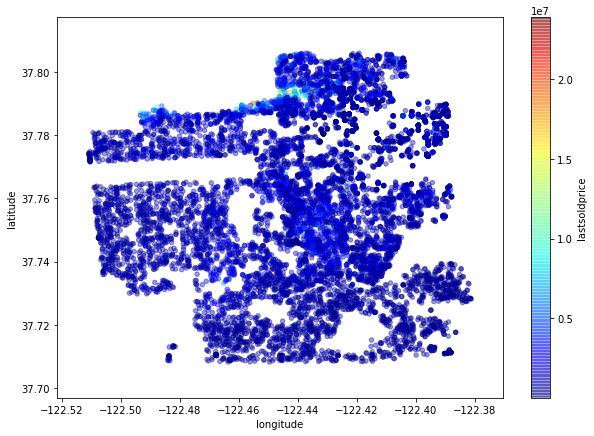

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#### The correlation of each independent variable (feature/predictor) to the dependent variable (target)

In [12]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647206
bathrooms        0.536879
zindexvalue      0.460474
bedrooms         0.398983
latitude         0.283171
totalrooms       0.093527
longitude       -0.052586
yearbuilt       -0.189092
Name: lastsoldprice, dtype: float64

#### The target variable (lastsoldprice) has a strong and positive correlation with the finishedsqft.

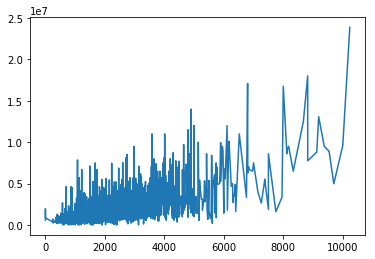

In [13]:
sorted_sf = sf.sort_values(by=['finishedsqft'])
plt.plot(sorted_sf['finishedsqft'][:-1], sorted_sf['lastsoldprice'][:-1])
plt.show()

In [14]:
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,975700
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,975700
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1277600
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,1277600
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1248000


#### Drop some of other non-informative features

In [15]:
sf.drop(sf.columns[[0, 4, 6, 7, 8]], axis=1, inplace=True)
sf = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt','zindexvalue', 'lastsoldprice']]
sf.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,1530000.0


#### Create dummy variables (converting categorical variables to numerical ones), as well as, indicating the predictors and target variables

In [16]:
X = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 
         'zindexvalue']]
Y = sf['lastsoldprice']
#create dummy variables for groups
m = pd.get_dummies(sf.usecode)
X = pd.concat([X, m], axis=1)

In [17]:
drops = ['usecode']
X.drop(drops, inplace=True, axis=1)

In [18]:
print(X.shape)
X.head()

(11329, 16)


,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,0,0,0,0,0,0,0,0,1,0


In [19]:
Y.shape

(11329,)

## Train and Build a ML Model

#### Generally, it is necessary to standardize/normalize the features before training. It will brings all the features into a common range (0.1) to avoid biasing toward big magnitudes.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

/home/saman/anaconda3/envs/env_tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/saman/anaconda3/envs/env_tensorflow/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Split the data set into training and test data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared accuracy: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared accuracy: 0.5279


In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 655348.2761


#### Linear regression model was able to predict the value of every house in the test set within 655000 of the real price.

In [25]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 376525.4169


In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

/home/saman/anaconda3/envs/env_tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
print('Random Forest R squared accuracy": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared accuracy": 0.6164


In [28]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 590729.4480


#### Random forest model was able to predict the value of every house in the test set within 590000 of the real price.

In [29]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
print('Gradient Boosting R squared accuracy": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared accuracy": 0.6239


In [31]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 584908.2750


#### Gradient boosting model was able to predict the value of every house in the test set within 583000 of the real price.

In [32]:
import lightgbm as lgb

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
gbm_mse = mean_squared_error(y_pred, y_test)
gbm_rmse = np.sqrt(gbm_mse)
print('Light GBM RMSE: %.4f' % gbm_rmse)

Starting training...
[1]	valid_0's l1: 594431	valid_0's l2: 9.00091e+11
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 590247	valid_0's l2: 8.88879e+11
[3]	valid_0's l1: 586225	valid_0's l2: 8.78518e+11
[4]	valid_0's l1: 582177	valid_0's l2: 8.67765e+11
[5]	valid_0's l1: 578834	valid_0's l2: 8.58414e+11
[6]	valid_0's l1: 574889	valid_0's l2: 8.48132e+11
[7]	valid_0's l1: 570997	valid_0's l2: 8.38017e+11
[8]	valid_0's l1: 567159	valid_0's l2: 8.28107e+11
[9]	valid_0's l1: 563368	valid_0's l2: 8.18376e+11
[10]	valid_0's l1: 560260	valid_0's l2: 8.10253e+11
[11]	valid_0's l1: 557256	valid_0's l2: 8.02004e+11
[12]	valid_0's l1: 553639	valid_0's l2: 7.92974e+11
[13]	valid_0's l1: 550071	valid_0's l2: 7.83944e+11
[14]	valid_0's l1: 546560	valid_0's l2: 7.75312e+11
[15]	valid_0's l1: 543139	valid_0's l2: 7.66861e+11
[16]	valid_0's l1: 540299	valid_0's l2: 7.59428e+11
[17]	valid_0's l1: 536873	valid_0's l2: 7.51114e+11
[18]	valid_0's l1: 533545	valid_0's l2: 7.4

[195]	valid_0's l1: 311945	valid_0's l2: 3.23858e+11
[196]	valid_0's l1: 311690	valid_0's l2: 3.2352e+11
[197]	valid_0's l1: 311365	valid_0's l2: 3.23035e+11
[198]	valid_0's l1: 311088	valid_0's l2: 3.2268e+11
[199]	valid_0's l1: 310780	valid_0's l2: 3.22195e+11
[200]	valid_0's l1: 310484	valid_0's l2: 3.21759e+11
Did not meet early stopping. Best iteration is:
[200]	valid_0's l1: 310484	valid_0's l2: 3.21759e+11
Starting predicting...
Light GBM RMSE: 567238.3104


#### Gradient boosting model with some parameter tunin was able to predict the value of every house in the test set within 567000 of the real price.